In [54]:
from standardInclude import *

from fit_util import *
from omega_a_fitting import *
from pileup_correction import *
from lost_muon_calculation import *

In [55]:
f = r.TFile("../truncationTest/data/results_1MissingFile_FullVsTrunc.root")
f.cd("clustersAndCoincidences")
f.ls()

TFile**		../truncationTest/data/results_1MissingFile_FullVsTrunc.root	
 TFile*		../truncationTest/data/results_1MissingFile_FullVsTrunc.root	
  TDirectoryFile*		clustersAndCoincidences	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
   KEY: TH3I	clusters;1	clusters
   KEY: TH2I	triples;1	triples
   KEY: TH2I	coincidenceTimeDiffs;1	coincidence time differences
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	coincidenceEnergies;1	coincidence energies
   KEY: TH2I	backwardsTriples;1	backwards triples
   KEY: TH2I	backwardsCoincidenceTimeDiffs;1	backwards coincidence time differences
   KEY: TH1I	backwardsCoincidenceEnergies;1	backwards coincidence energies
   KEY: TH1I	ctag;1	ctag
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistog

In [56]:
clusters = f.Get("clustersAndCoincidences").Get("clusters")
#clusters = f.Get("clustersAndCoincidencesTrunc").Get("clusters")
print(clusters)

<ROOT.TH3I object ("clusters") at 0x7fffe63ce5f0>


---

### Lets set up the parameters

In [57]:
e1_nominal = 1700
deltaE = 200
e2 = 3100

calo = 0

e2_bin = clusters.GetYaxis().FindBin(e2 - 1)

### Which bins are we going to loop over?

In [58]:
energyBinCenters = []
energyBinLowerBounds = []
whichBins = []
for i in range(clusters.GetNbinsY()+1):
    energyBinCenters.append( clusters.GetYaxis().GetBinCenter(i) )
    boundi = clusters.GetYaxis().GetBinCenter(i) - clusters.GetYaxis().GetBinWidth(i)/2.0
    if((boundi >= e1_nominal - deltaE) and (boundi <= e1_nominal + deltaE)):
        whichBins.append(i)
    energyBinLowerBounds.append( boundi )

print(whichBins)
#for bin in whichBins:
#    print(bin, energyBinLowerBounds[bin])

[76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]


In [59]:
Rvals = []
for e1_bin in whichBins:
    print("************************************************************************************************************")
    print("Starting bin:", e1_bin, "(", energyBinLowerBounds[e1_bin],"MeV )")
    
    wiggle = MakeWiggleFromTH3(clusters, e1_bin, e2_bin, calo, 1, False, "bin")
    DumpClass(wiggle)
    
    fitFunc = WiggleFit(GetBlindingPhrase("./blinding.txt"), "5par")
    
    fit = BuildTF1(fitFunc, 5, "5par", "five_parameter_fit", 30, 650)
    fit.SetParameters([8926203,64.434,0.34402,-38,5.15])
    fit.SetParNames()
    
    fitter = WiggleFitter(wiggle.h, fit, "5par", "REMB", 2)
    fitter.Fit(2)
    
    Rvals.append( fitter.ReturnParameters() )

************************************************************************************************************
Starting bin: 76 ( 1500.0 MeV )
Dumping:  <omega_a_fitting.MakeWiggleFromTH3 object at 0x7f707ceb90f0>
Class:  <class 'omega_a_fitting.MakeWiggleFromTH3'>
    elow = 76
    ehigh = 155
    timeScaleFactor = 1
    caloNum = 0
    isPileupCorrected = False
    BinOrEnergy = bin
    title = Wiggle Plot for [76 < E (Bin) < 155] in Calo 0
    h = <ROOT.TH1D object ("wiggle_76_155_0") at 0x7f707bf60bd0>
Starting fit 1 / 2
Parameters from this fit: 
      N  =  10150578.767856937 +/- 344.96222208924627
      #tau_{#mu}  =  64.44310001172569 +/- 0.0012340247243036334
      A  =  0.3192254090146183 +/- 2.587899966705892e-05
      R  =  -38.12772880446522 +/- 0.8978265289648415
      #phi_{a}  =  5.222045235055518 +/- 0.00014744400010509494
Starting fit 2 / 2
Parameters from this fit: 
      N  =  10150578.75357926 +/- 344.9605580532576
      #tau_{#mu}  =  64.4430999542025 +/- 0.00123401

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it

In [60]:
Rpars = [x[3] for x in Rvals]

In [61]:
Rs, Rerrs = zip(*Rpars)
whichEnergies = [energyBinCenters[x] for x in whichBins]

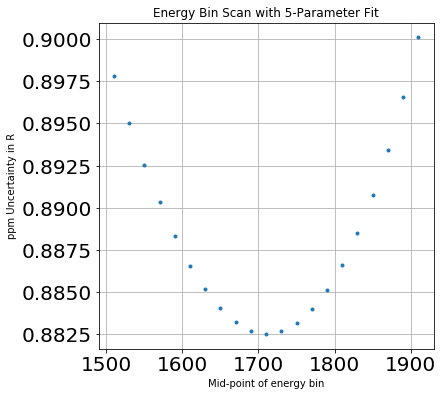

In [62]:
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(whichEnergies,Rerrs,".")
#plt.ylim(0.87,0.9)
plt.grid()
plt.title("Energy Bin Scan with 5-Parameter Fit")
plt.xlabel("Mid-point of energy bin")
plt.ylabel("ppm Uncertainty in R")
plt.show()

In [63]:
ys = [Rerrs]
inflectionPoints = []
for y in ys:
    gr = r.TGraph()
    for i, yi in enumerate(y):
        gr.SetPoint(i, whichEnergies[i], yi)
    p2 = r.TF1("p2","pol2")
    gr.Fit("p2")
    
    par1= p2.GetParameter(1)
    par2 = p2.GetParameter(2)
    infi = -1*par1 / (2* par2)
    inflectionPoints.append(infi)


****************************************
Minimizer is Linear
Chi2                      =  1.34898e-06
NDf                       =           18
p0                        =      2.07766   +/-   0.0133214   
p1                        =  -0.00140092   +/-   1.56354e-05 
p2                        =  4.10525e-07   +/-   4.56947e-09 


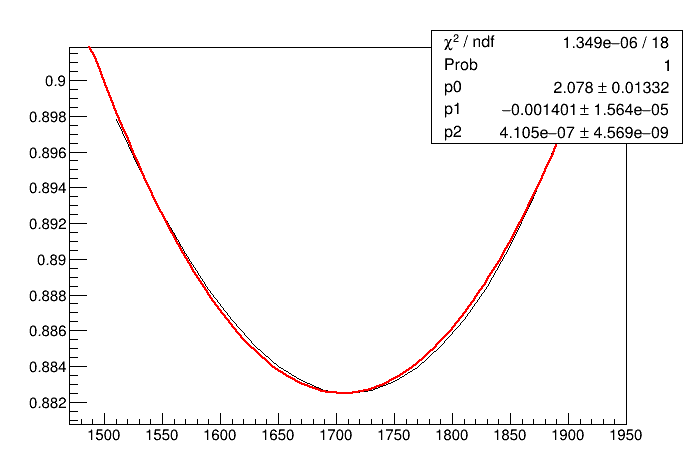

In [64]:
c = r.TCanvas()
gr.Draw("apl")
c.Draw()

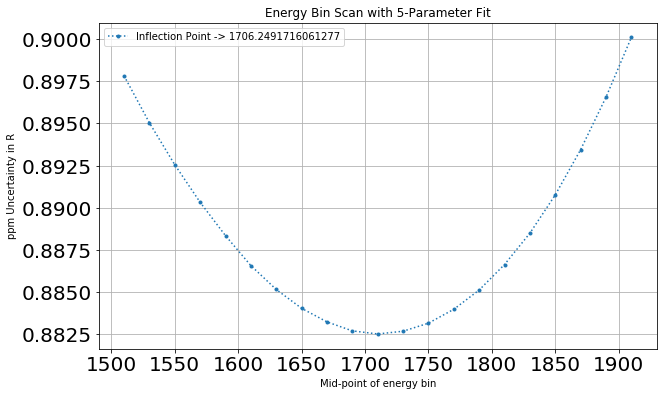

In [65]:
fig,ax = plt.subplots(figsize=(10,6))
plt.plot(whichEnergies,Rerrs,".:", label="Inflection Point -> "+str(inflectionPoints[0]))
#plt.ylim(0.87,0.9)
plt.grid()
plt.title("Energy Bin Scan with 5-Parameter Fit")
plt.xlabel("Mid-point of energy bin")
plt.ylabel("ppm Uncertainty in R")
plt.legend(loc=2)
plt.show()